In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive
!mkdir nlptask
%cd /content/drive/MyDrive/nlptask

/content/drive/MyDrive
mkdir: cannot create directory ‘nlptask’: File exists
/content/drive/MyDrive/nlptask


In [5]:
import requests
from bs4 import BeautifulSoup
import pickle

In [6]:
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all("div", class_="elementor-widget-theme-post-content") ]
    print(url)
    return text

In [7]:
urls = ['https://scrapsfromtheloft.com/movies/the-kings-man-2021-transcript/',
         'https://scrapsfromtheloft.com/comedy/munich-edge-of-war-transcript/',
         'https://scrapsfromtheloft.com/movies/matrix-resurrections-transcript/',
         'https://scrapsfromtheloft.com/movies/the-adam-project-transcript/',
         'https://scrapsfromtheloft.com/movies/moonfall-2022-transcript/',
         'https://scrapsfromtheloft.com/movies/infinite-2021-transcript/',
         'https://scrapsfromtheloft.com/movies/godzilla-vs-kong-2021-transcript/',]

# Movie names
movies = ['the-kings-man', 'munich-edge-of-war', 'matrix-resurrections', 'the-adam-project', 'moonfall', 'infinite', 'godzilla-vs-kong']

In [8]:
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/movies/the-kings-man-2021-transcript/
https://scrapsfromtheloft.com/comedy/munich-edge-of-war-transcript/
https://scrapsfromtheloft.com/movies/matrix-resurrections-transcript/
https://scrapsfromtheloft.com/movies/the-adam-project-transcript/
https://scrapsfromtheloft.com/movies/moonfall-2022-transcript/
https://scrapsfromtheloft.com/movies/infinite-2021-transcript/
https://scrapsfromtheloft.com/movies/godzilla-vs-kong-2021-transcript/


In [9]:
!mkdir transcripts

for i, c in enumerate(movies):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [10]:
data = {}
for i, c in enumerate(movies):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [11]:
data.keys()

dict_keys(['the-kings-man', 'munich-edge-of-war', 'matrix-resurrections', 'the-adam-project', 'moonfall', 'infinite', 'godzilla-vs-kong'])

In [12]:
data['the-kings-man'][:2]

['\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time to stop them.\nDirector: Matthew Vaughn\nBased on the Comic Book “The Secret Service” by Mark Millar and Dave Gibbons\nProduced by: Matthew Vaughn, David Reid, Adam Bohling\nCast: Ralph Fiennes, Gemma Arterton, Rhys Ifans, Matthew Goode, Tom Hollander, Harris Dickinson, Daniel Brühl, with Djimon Hounsou, and Charles Dance\n\n* * *\nYour Grace.\n(INDISTINCT CHATTER)\nSergeant, I’m here on behalf of the Red Cross and I’d like to speak with General Kitchener.\nThere is no General Kitchener here.\nYour Grace? Your Grace? Let… Let him in.\nWell, if Morton’s here, then Kitchener can’t be far away.\nMy apologies, Your Grace.\nSecurity’s paramount right now.\nIt’s a secret that you’re visiting with the general.\nWe can’t be too careful with these Boers\nand their guerilla tactics.\nToo careful?\nLooks like this place could use a lot more care.\nBeg

In [13]:
next(iter(data.keys()))

'the-kings-man'

In [14]:
next(iter(data.values()))

['\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time to stop them.\nDirector: Matthew Vaughn\nBased on the Comic Book “The Secret Service” by Mark Millar and Dave Gibbons\nProduced by: Matthew Vaughn, David Reid, Adam Bohling\nCast: Ralph Fiennes, Gemma Arterton, Rhys Ifans, Matthew Goode, Tom Hollander, Harris Dickinson, Daniel Brühl, with Djimon Hounsou, and Charles Dance\n\n* * *\nYour Grace.\n(INDISTINCT CHATTER)\nSergeant, I’m here on behalf of the Red Cross and I’d like to speak with General Kitchener.\nThere is no General Kitchener here.\nYour Grace? Your Grace? Let… Let him in.\nWell, if Morton’s here, then Kitchener can’t be far away.\nMy apologies, Your Grace.\nSecurity’s paramount right now.\nIt’s a secret that you’re visiting with the general.\nWe can’t be too careful with these Boers\nand their guerilla tactics.\nToo careful?\nLooks like this place could use a lot more care.\nBeg

In [15]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

In [16]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [17]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
godzilla-vs-kong,"\n\nFive years after the death of King Ghidorah, Godzilla and Kong are the last known active Titans on Earth’s surface. Skull Island’s climate has..."
infinite,"\n\nFor Evan McCauley (Mark Wahlberg), skills he has never learned and memories of places he has never visited haunt his daily life. Self-medicate..."
matrix-resurrections,"\n\nReturn to a world of two realities: one, everyday life; the other, what lies behind it. To find out if his reality is a construct, to truly kn..."
moonfall,"\n\nIn Moonfall, a mysterious force knocks the Moon from its orbit around Earth and sends it hurdling on a collision course with life as we know i..."
munich-edge-of-war,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki..."
the-adam-project,"\n\nAdam Reed, age 13, and still grieving the sudden death of his father a year earlier, walks into his garage one night to find a wounded pilot h..."
the-kings-man,"\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time ..."


In [18]:
data_df.transcript.loc['infinite']

'\n\nFor Evan McCauley (Mark Wahlberg), skills he has never learned and memories of places he has never visited haunt his daily life. Self-medicated and on the brink of a mental breakdown, Evan is sought by a secret group that call themselves “Infinites,” revealing to him that his memories may be real–but they are from multiple past lives. The Infinites bring Evan into their extraordinary world, where a gifted few are given the ability to be reborn with their memories and knowledge accumulated over centuries. With critical secrets buried in his past, Evan must work with the Infinites to unlock the answers in his memories in a race against time to save humanity from one of their own (Chiwetel Ejiofor) who seeks to end all life to stop what he views as the cursed, endless cycle of reincarnation.\n\n* * *\n[man] There are among us a people, gifted with a perfect memory of all their past lives.\nThey call themselves Infinites.\nAmong the Infinites, two groups have vied for power.\nOn one s

In [19]:
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [20]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
godzilla-vs-kong,\n\nfive years after the death of king ghidorah godzilla and kong are the last known active titans on earth’s surface skull island’s climate has b...
infinite,\n\nfor evan mccauley mark wahlberg skills he has never learned and memories of places he has never visited haunt his daily life selfmedicated and...
matrix-resurrections,\n\nreturn to a world of two realities one everyday life the other what lies behind it to find out if his reality is a construct to truly know him...
moonfall,\n\nin moonfall a mysterious force knocks the moon from its orbit around earth and sends it hurdling on a collision course with life as we know it...
munich-edge-of-war,\n\na british diplomat travels to munich in the runup to world war ii where a former classmate of his from oxford is also en route but is working ...
the-adam-project,\n\nadam reed age and still grieving the sudden death of his father a year earlier walks into his garage one night to find a wounded pilot hiding...
the-kings-man,\n\nas a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions one man must race against time t...


In [21]:
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [22]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
godzilla-vs-kong,five years after the death of king ghidorah godzilla and kong are the last known active titans on earths surface skull islands climate has been de...
infinite,for evan mccauley mark wahlberg skills he has never learned and memories of places he has never visited haunt his daily life selfmedicated and on ...
matrix-resurrections,return to a world of two realities one everyday life the other what lies behind it to find out if his reality is a construct to truly know himself...
moonfall,in moonfall a mysterious force knocks the moon from its orbit around earth and sends it hurdling on a collision course with life as we know it wit...
munich-edge-of-war,a british diplomat travels to munich in the runup to world war ii where a former classmate of his from oxford is also en route but is working for ...
the-adam-project,adam reed age and still grieving the sudden death of his father a year earlier walks into his garage one night to find a wounded pilot hiding the...
the-kings-man,as a collection of historys worst tyrants and criminal masterminds gather to plot a war to wipe out millions one man must race against time to sto...


In [23]:
full_names = ['The Kings Man', 'Munich Edge of War', 'Matrix Resurrections', 'The Adam Project', 'Moonfall', 'Infinite', 'Godzilla vs Kong']

data_df['full_name'] = full_names
data_df

,transcript,full_name
godzilla-vs-kong,"\n\nFive years after the death of King Ghidorah, Godzilla and Kong are the last known active Titans on Earth’s surface. Skull Island’s climate has...",The Kings Man
infinite,"\n\nFor Evan McCauley (Mark Wahlberg), skills he has never learned and memories of places he has never visited haunt his daily life. Self-medicate...",Munich Edge of War
matrix-resurrections,"\n\nReturn to a world of two realities: one, everyday life; the other, what lies behind it. To find out if his reality is a construct, to truly kn...",Matrix Resurrections
moonfall,"\n\nIn Moonfall, a mysterious force knocks the Moon from its orbit around Earth and sends it hurdling on a collision course with life as we know i...",The Adam Project
munich-edge-of-war,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki...",Moonfall
the-adam-project,"\n\nAdam Reed, age 13, and still grieving the sudden death of his father a year earlier, walks into his garage one night to find a wounded pilot h...",Infinite
the-kings-man,"\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time ...",Godzilla vs Kong


In [24]:
data_df.to_pickle("corpus.pkl")

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aah,abandon,abandoning,abdication,abdicationimmediatelyall,abel,abelbefore,abide,abilities,ability,...,zimmermannthe,zion,zionive,zip,zonecaptain,zones,zonetearing,zu,zulu,zurück
godzilla-vs-kong,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
infinite,0,0,0,0,0,3,1,0,1,3,...,0,0,0,0,0,0,0,0,0,0
matrix-resurrections,0,0,0,0,0,0,0,1,0,0,...,0,4,1,0,1,1,0,0,0,0
moonfall,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,0
munich-edge-of-war,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,1
the-adam-project,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
the-kings-man,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
data_dtm.to_pickle("dtm.pkl")

In [27]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [28]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
godzilla-vs-kong,"\n\nFive years after the death of King Ghidorah, Godzilla and Kong are the last known active Titans on Earth’s surface. Skull Island’s climate has...",The Kings Man
infinite,"\n\nFor Evan McCauley (Mark Wahlberg), skills he has never learned and memories of places he has never visited haunt his daily life. Self-medicate...",Munich Edge of War
matrix-resurrections,"\n\nReturn to a world of two realities: one, everyday life; the other, what lies behind it. To find out if his reality is a construct, to truly kn...",Matrix Resurrections
moonfall,"\n\nIn Moonfall, a mysterious force knocks the Moon from its orbit around Earth and sends it hurdling on a collision course with life as we know i...",The Adam Project
munich-edge-of-war,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki...",Moonfall
the-adam-project,"\n\nAdam Reed, age 13, and still grieving the sudden death of his father a year earlier, walks into his garage one night to find a wounded pilot h...",Infinite
the-kings-man,"\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time ...",Godzilla vs Kong


In [29]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
godzilla-vs-kong,"\n\nFive years after the death of King Ghidorah, Godzilla and Kong are the last known active Titans on Earth’s surface. Skull Island’s climate has...",The Kings Man,0.095113,0.500671
infinite,"\n\nFor Evan McCauley (Mark Wahlberg), skills he has never learned and memories of places he has never visited haunt his daily life. Self-medicate...",Munich Edge of War,0.121250,0.482500
matrix-resurrections,"\n\nReturn to a world of two realities: one, everyday life; the other, what lies behind it. To find out if his reality is a construct, to truly kn...",Matrix Resurrections,0.068463,0.541005
moonfall,"\n\nIn Moonfall, a mysterious force knocks the Moon from its orbit around Earth and sends it hurdling on a collision course with life as we know i...",The Adam Project,0.062567,0.494737
munich-edge-of-war,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki...",Moonfall,0.105810,0.423666
the-adam-project,"\n\nAdam Reed, age 13, and still grieving the sudden death of his father a year earlier, walks into his garage one night to find a wounded pilot h...",Infinite,0.094189,0.515092
the-kings-man,"\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time ...",Godzilla vs Kong,0.084958,0.508720


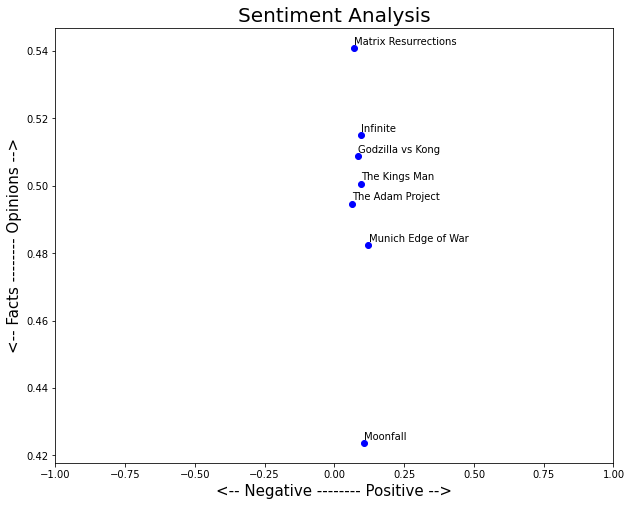

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [32]:
import numpy as np
import math

def split_text(text, n=10):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [33]:
data

,transcript,full_name,polarity,subjectivity
godzilla-vs-kong,"\n\nFive years after the death of King Ghidorah, Godzilla and Kong are the last known active Titans on Earth’s surface. Skull Island’s climate has...",The Kings Man,0.095113,0.500671
infinite,"\n\nFor Evan McCauley (Mark Wahlberg), skills he has never learned and memories of places he has never visited haunt his daily life. Self-medicate...",Munich Edge of War,0.121250,0.482500
matrix-resurrections,"\n\nReturn to a world of two realities: one, everyday life; the other, what lies behind it. To find out if his reality is a construct, to truly kn...",Matrix Resurrections,0.068463,0.541005
moonfall,"\n\nIn Moonfall, a mysterious force knocks the Moon from its orbit around Earth and sends it hurdling on a collision course with life as we know i...",The Adam Project,0.062567,0.494737
munich-edge-of-war,"\n\nA British diplomat travels to Munich in the run-up to World War II, where a former classmate of his from Oxford is also en route, but is worki...",Moonfall,0.105810,0.423666
the-adam-project,"\n\nAdam Reed, age 13, and still grieving the sudden death of his father a year earlier, walks into his garage one night to find a wounded pilot h...",Infinite,0.094189,0.515092
the-kings-man,"\n\nAs a collection of history’s worst tyrants and criminal masterminds gather to plot a war to wipe out millions, one man must race against time ...",Godzilla vs Kong,0.084958,0.508720


In [34]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['\n\nFive years after the death\xa0of\xa0King Ghidorah,\xa0Godzilla\xa0and\xa0Kong\xa0are the last known active Titans on Earth’s surface.\xa0Skull Island’s climate has been destabilized, and Monarch now houses Kong inside a gigantic dome. Kong is constantly visited by Jia, the last Iwi native who is\xa0deaf\xa0and can communicate with him via\xa0sign language. Bernie Hayes, a Titan conspiracy theorist and former employee of Apex Cybernetics, leaks information about suspicious activities at an Apex facility in\xa0Pensacola, Florida. Godzilla suddenly appears and attacks the base; during the rampage, Bernie discovers a device similar to the ORCA, previously used to communicate with or control Titans.\nMadison Russell, the daughter of Monarch scientist Mark Russell, enlists her friend Josh to investigate the cause of Godzilla’s attack. Along with Bernie, they sneak into the wrecked Apex facility and discover a secret underground laboratory where they are inadvertently locked and transp

In [35]:
len(list_pieces)

7

In [36]:
len(list_pieces[0])

10

In [37]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.06846370683579987,
  0.09979256854256854,
  0.23396074646074644,
  0.055722111669692306,
  0.17049813612313613,
  0.05993906455862978,
  0.0584750098386462,
  0.03863038870851371,
  0.1319039171006944,
  0.19913529265873012],
 [0.07285025580480128,
  0.2360034013605443,
  0.16916625243296754,
  0.00499848865327381,
  0.1440725940725941,
  0.09450042127584389,
  0.09246060838802773,
  0.13573638167388166,
  0.17500759232264332,
  0.10114486569564692],
 [0.0791104638825227,
  0.12383089489689958,
  0.040897986715220935,
  0.0519047619047619,
  0.09729949104949107,
  0.1350902677569344,
  0.09484313662741081,
  0.03496770156926407,
  0.02823389355742297,
  -0.0316658345081454],
 [-0.02309106311915299,
  0.038839333181438444,
  0.060265822678613384,
  0.0469039888682746,
  0.02104408935291287,
  0.09707251082251082,
  0.14252066798941795,
  0.08223580289721068,
  0.12597750481327247,
  0.03434080054655275],
 [0.06575183138352557,
  0.04698585416156172,
  0.14278381283068786,
  0.14115

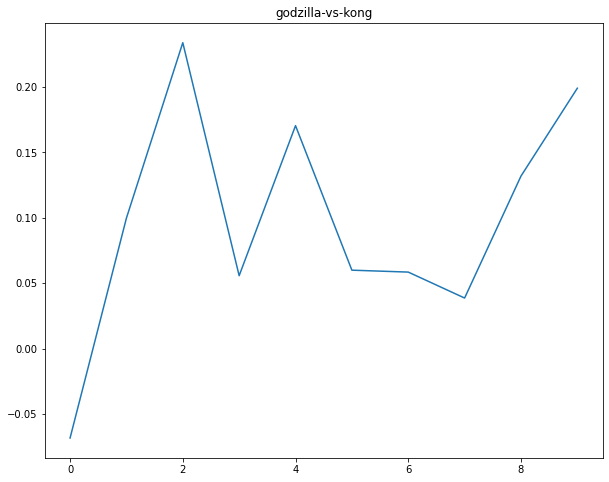

In [38]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

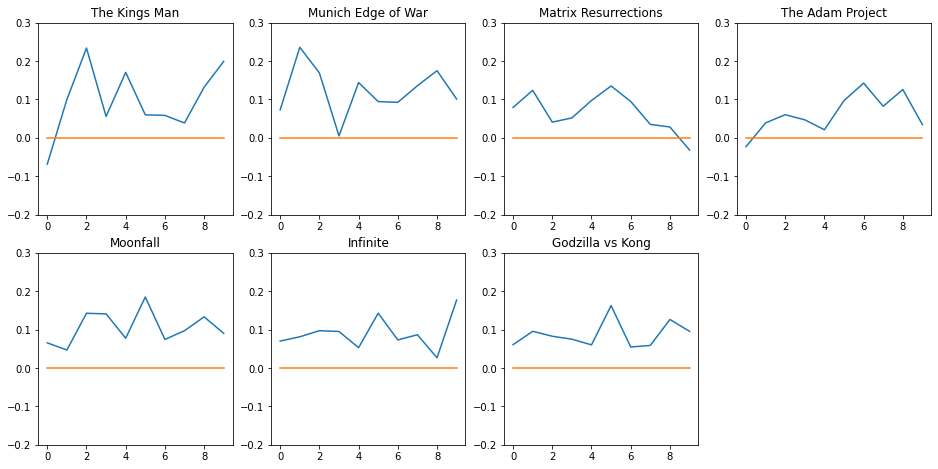

In [39]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()